# K-means

In [16]:
# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Generate data

In [17]:
# Generate Data
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
              (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
              (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

### Main functions

In [18]:
def initialize_centroids(points, k):
    '''
        Selects k random points as initial
        points from dataset
    '''
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [78]:
initialize_centroids(points,3)

array([[-0.6137597 , -0.39603014],
       [-0.84796568,  0.46598821],
       [ 0.7252003 ,  0.95479368]])

In [79]:
def closest_centroid(points, centroids):
    '''
        Returns an array containing the index to the nearest centroid for each point
    '''
    dists = np.sqrt((points - centroids[:,np.newaxis])**2).sum(axis=2)
    return np.argmin(dists, axis = 0)

In [100]:
points.shape

(250, 2)

In [99]:
centroids[:,np.newaxis].shape

(10, 1, 2)

In [102]:
centroids.shape

(10, 2)

In [108]:
points[:5]

array([[ 0.91326132,  0.36415259],
       [ 1.05604556,  0.07871516],
       [ 0.84771457,  0.26576375],
       [ 1.59329332, -0.19171556],
       [ 1.04910016,  0.34849256]])

In [126]:
centroids

array([[-0.34788928, -0.29570099],
       [ 0.07131502, -1.23237642],
       [ 1.42834233,  1.21401771],
       [ 0.58806807, -0.18248707],
       [-0.0627667 ,  0.55188713],
       [ 1.53417844,  0.21627701],
       [ 0.78620617,  0.73949081],
       [ 1.71501674, -0.91822337],
       [-0.59117702,  0.48953456],
       [-0.83459839, -0.70427178]])

In [112]:
(points - centroids[:,np.newaxis]).shape

(10, 250, 2)

In [125]:
(points - centroids[:,np.newaxis])

array([[[ 1.2611506 ,  0.65985357],
        [ 1.40393484,  0.37441614],
        [ 1.19560385,  0.56146473],
        ..., 
        [ 0.47259796, -0.70191649],
        [-0.38515909,  0.4718968 ],
        [-0.26587042, -0.10032915]],

       [[ 0.84194629,  1.59652901],
        [ 0.98473053,  1.31109158],
        [ 0.77639955,  1.49814017],
        ..., 
        [ 0.05339365,  0.23475895],
        [-0.80436339,  1.40857224],
        [-0.68507472,  0.83634629]],

       [[-0.51508102, -0.84986512],
        [-0.37229678, -1.13530255],
        [-0.58062776, -0.94825396],
        ..., 
        [-1.30363366, -2.21163518],
        [-2.1613907 , -1.03782189],
        [-2.04210203, -1.61004784]],

       ..., 
       [[-0.80175543,  1.28237595],
        [-0.65897119,  0.99693852],
        [-0.86730217,  1.18398711],
        ..., 
        [-1.59030807, -0.07939411],
        [-2.44806511,  1.09441918],
        [-2.32877644,  0.52219323]],

       [[ 1.50443834, -0.12538198],
        [ 1.64722258, -

In [121]:
 dists = ((points - centroids[:,np.newaxis])).sum(axis=0)

In [122]:
dists.shape

(250, 2)

In [124]:
dists

array([[  4.84591778,   3.76337827],
       [  6.27376018,   0.90900396],
       [  4.19045035,   2.77948985],
       [ 11.64623786,  -1.79530318],
       [  6.20430626,   3.60677804],
       [  8.22869505,   9.25390224],
       [ 12.96352318,   3.69639554],
       [  3.64242338,   2.83727616],
       [  2.96530767,   9.66978917],
       [ 10.37085302,   7.79227966],
       [ 12.48558871,   0.36160314],
       [  6.28290119,  -1.90058499],
       [ 14.93120327,   2.70927252],
       [  9.48852823,  -4.73024055],
       [ 14.98246135, -10.49057785],
       [  3.94856593, -15.31283816],
       [ 14.30828722,  -5.08204431],
       [ 26.42531205, -14.97105592],
       [ -6.69380079,  11.64478264],
       [ 11.31755166,  -4.73075835],
       [  6.55472017,   3.07366976],
       [ 18.01986306, -12.99435411],
       [  8.99622361,   5.55028203],
       [ -8.41586104,   5.69352105],
       [ -0.69119799,   3.36179514],
       [ 10.98877008,   2.98610495],
       [  2.50273325,   5.04431896],
 

In [80]:
def move_centroids(points, closest, centroids):
    '''
        Returns the new centroids assigned from the points closest to them
    '''
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])


In [81]:
def main(points):
    num_iterations = 100
    k = 10
        
    # Initialize centroids
    centroids = initialize_centroids(points, k)
    
    # Run iterative process
    for i in range(num_iterations):
        closest = closest_centroid(points, centroids)
        centroids = move_centroids(points, closest, centroids)
    
    return centroids

In [82]:
centroids = main(points)

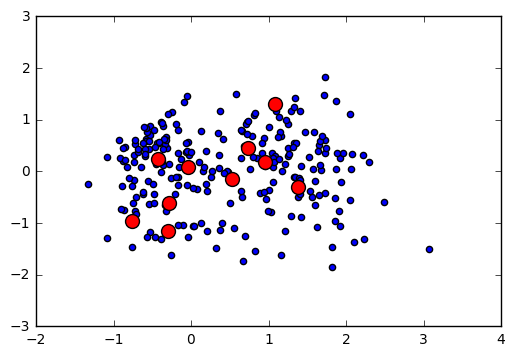

In [83]:
centroids = initialize_centroids(points, 10)

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
ax = plt.gca()

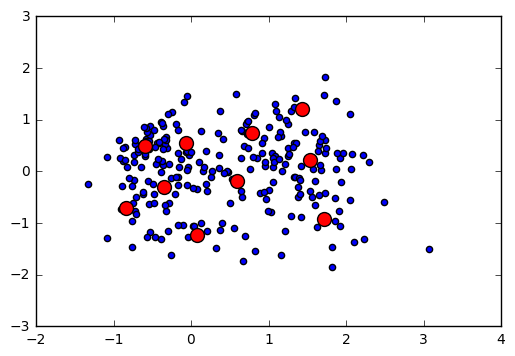

In [90]:
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
ax = plt.gca()